# Linear Algorithms Using Keras 
### by Jared Rentz
##  Import all models and libraries

In [7]:
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.optimizers import Adam, SGD
import pandas as pd

## Setting up Keras Sequential Model
We will be using a Sequential model with only 1 output and 1 input.\
The input will be "X" and the output (value to predict) will be "y_true"\
Keras uses 4 parts in creating a model.\
1.) Create the object of Sequential() by calling it and placing it in the model variable.\
2.) Call the method of the "model" object called "add". It allows you to add to the initial object.\
    The layer that we will use in this model is called Dense which is just a "connected network".\
    It takes something in from the one layer and passes it to the next layer.\
    (The first "1" in the Dense method below is how many items you want it to pass to the next layer)
    (input_shape is always placed on the first layer of a model to tell the object how many features to expect)

In [2]:
model = Sequential()
model.add(Dense(1, input_shape=(1,)))
model.summary()

W0820 15:30:13.063533 32612 deprecation_wrapper.py:119] From C:\Users\jared.rentz\AppData\Local\Continuum\anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0820 15:30:13.110250 32612 deprecation_wrapper.py:119] From C:\Users\jared.rentz\AppData\Local\Continuum\anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0820 15:30:13.119813 32612 deprecation_wrapper.py:119] From C:\Users\jared.rentz\AppData\Local\Continuum\anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.



_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 1)                 2         
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


In [16]:
df = pd.read_csv('../data/weight-height.csv')
df.head()

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


3.) We compile the method so we can prepare it to learn.\
    Here we use "Adam" as our bias optimizer and our cost function/loss is 'mean_squared_error'\
    Which is just SUM((Predicted y - Actual y)^2)
    
## Bias function and the Cost Function

In [5]:
model.compile(Adam(lr=0.8), loss='mean_squared_error')

4.) Last thing we need to do is fit our model. Which is actually the training part.\
    We are taking the model, assinging weights and biasis to each node which we called above\
    You will see we take in the "X" as 1 of the features we want to predict but it can be more in your model\
    y_true which is the actual corresponding value observed in the data.\
    
    Epochs = The number of times you want the model to try and decrease the loss and learn the best weights

In [9]:
X = df.Height
y_true = df.Weight
model.fit(X,y_true, epochs=40)

Epoch 1/40
10000/10000 [==============================] - 0s 28us/step - loss: 577.7139
Epoch 2/40
10000/10000 [==============================] - 0s 26us/step - loss: 538.2249
Epoch 3/40
10000/10000 [==============================] - 0s 28us/step - loss: 500.8703
Epoch 4/40
10000/10000 [==============================] - 0s 27us/step - loss: 470.0351
Epoch 5/40
10000/10000 [==============================] - 0s 32us/step - loss: 426.1872
Epoch 6/40
10000/10000 [==============================] - 0s 34us/step - loss: 390.1494
Epoch 7/40
10000/10000 [==============================] - 0s 32us/step - loss: 374.1070
Epoch 8/40
10000/10000 [==============================] - 0s 34us/step - loss: 308.0546
Epoch 9/40
10000/10000 [==============================] - 0s 48us/step - loss: 292.4117
Epoch 10/40
10000/10000 [==============================] - 1s 63us/step - loss: 274.8133
Epoch 11/40
10000/10000 [==============================] - 0s 39us/step - loss: 249.5439
Epoch 12/40
10000/10000 [=====

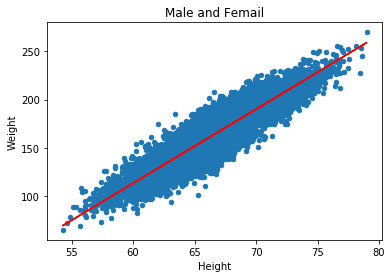

In [12]:
y_pred = model.predict(X)
import matplotlib.pyplot as plt
df.plot(kind='scatter',
       x = 'Height',
       y = 'Weight',
       title= 'Male and Femail')
plt.plot(X,y_pred, color='Red')

## Getting the weights of your Linear Formula
Our linear formula is y-hat = Bias + (X*Weight)\
X = will be the value of the actual data point we are looking at.\
W = weight that or slope of that X-value (data point)\
B = Bias (aka y-intercept for the function of a line ie.. y=mx + b)

In [13]:
W, B = model.get_weights()

In [14]:
W

array([[7.6902714]], dtype=float32)

In [15]:
B 

array([-348.29297], dtype=float32)